In [190]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager

In [191]:
def read_data(path):
    f = open(path, 'r')
    for i in range(6):
        f.readline()
    rate_list = []
    line = f.readline().split()
    # print(line)
    while len(line) != 0:
        try:
            rate = float(line[6])
            if line[7] == "Kbits/sec":
                # print(rate)
                rate >>= 3
        except:
            line = f.readline().split()
            continue
        rate_list.append(rate)
        line = f.readline().split()
    y = np.array(rate_list)
    return y

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [192]:
font = font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal',
                                   size=20)

In [193]:
# filename = sys.argv[1]
cts_data = np.load('cts_data_2.npy')
ts_data = np.load('ts_data_2.npy')
cucb_data = np.load('cklucb_data_2.npy')
ucb_data = np.load('klucb_data_2.npy')
mins_data = np.load('mins_data_2.npy')

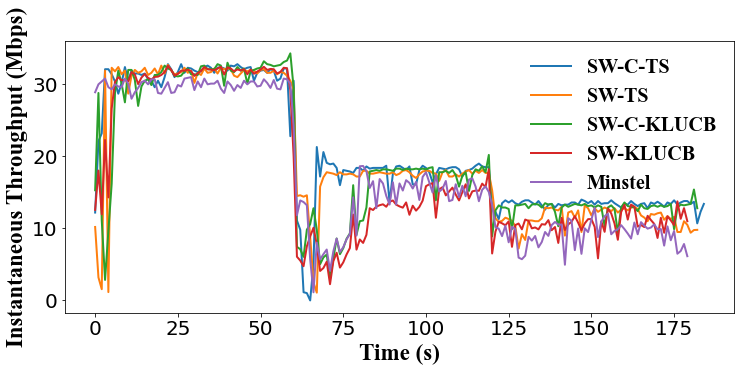

In [194]:
# plt.style.use('ieee')
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(cts_data, label='SW-C-TS',linewidth=2)
ax1.plot(ts_data, label='SW-TS',linewidth=2)
ax1.plot(cucb_data, label='SW-C-KLUCB',linewidth=2)
ax1.plot(ucb_data, label='SW-KLUCB',linewidth=2)
ax1.plot(mins_data, label='Minstel',linewidth=2)
ax1.legend(loc='upper right',prop=font,frameon=False)
plt.tick_params(labelsize=20)
labels=ax1.get_xticklabels()+ax1.get_yticklabels()
# plt.title('Instantaneous throughput of the various RA algorithms in 802.11n systems under non-stationary environment')
plt.xlabel('Time (s)',fontfamily='Times New Roman',fontsize=23,fontweight='bold')
plt.ylabel('Instantaneous Throughput (Mbps)',fontfamily='Times New Roman',fontsize=23,fontweight='bold')
plt.show()

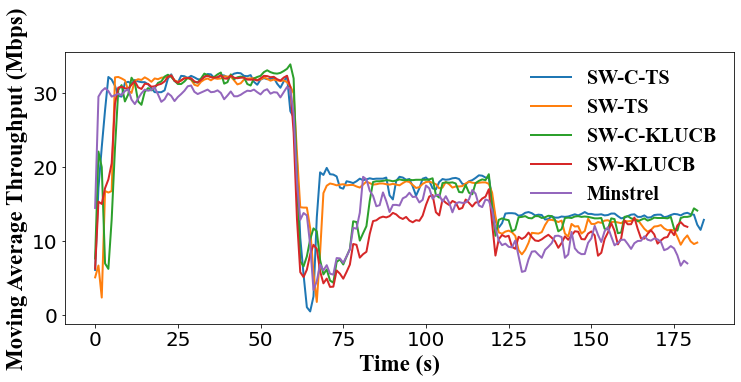

In [195]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(smooth(cts_data,2), label='SW-C-TS',linewidth=2)
ax1.plot(smooth(ts_data,2), label='SW-TS',linewidth=2)
ax1.plot(smooth(cucb_data,2), label='SW-C-KLUCB',linewidth=2)
ax1.plot(smooth(ucb_data,2), label='SW-KLUCB',linewidth=2)
ax1.plot(smooth(mins_data,2), label='Minstrel',linewidth=2)
ax1.legend(loc='upper right',prop=font, frameon=False)
plt.tick_params(labelsize=20)
labels=ax1.get_xticklabels()+ax1.get_yticklabels()
# plt.title('Instantaneous throughput of the various RA algorithms in 802.11n systems under non-stationary environment')
plt.xlabel('Time (s)',fontfamily='Times New Roman',fontsize=23,fontweight='bold')
plt.ylabel('Moving Average Throughput (Mbps)',fontfamily='Times New Roman',fontsize=23,fontweight='bold')
plt.show()

In [196]:
# np.save('cts_data_2',cts_data)
# np.save('ts_data_2',ts_data)
# np.save('cklucb_data_2',cucb_data)
# np.save('klucb_data_2',ucb_data)
# np.save('mins_data_2',mins_data)

In [197]:
cts_tp_1 = np.mean(cts_data[10:50])
ts_tp_1 = np.mean(ts_data[10:50])
cucb_tp_1 = np.mean(cucb_data[10:50])
ucb_tp_1 = np.mean(ucb_data[10:50])
min_tp_1 = np.mean(mins_data[10:50])

cts_tp_2 = np.mean(cts_data[80:110])
ts_tp_2 = np.mean(ts_data[80:110])
cucb_tp_2 = np.mean(cucb_data[80:110])
ucb_tp_2 = np.mean(ucb_data[80:110])
min_tp_2 = np.mean(mins_data[80:110])

cts_tp_3 = np.mean(cts_data[130:170])
ts_tp_3 = np.mean(ts_data[130:170])
cucb_tp_3 = np.mean(cucb_data[130:170])
ucb_tp_3 = np.mean(ucb_data[130:170])
min_tp_3 = np.mean(mins_data[130:170])

cts_err_1 = np.std(cts_data[10:50])
ts_err_1 = np.std(ts_data[10:50])
cucb_err_1 = np.std(cucb_data[10:50])
ucb_err_1 = np.std(ucb_data[10:50])
min_err_1 = np.std(mins_data[10:50])

cts_err_2 = np.std(cts_data[80:110])
ts_err_2 = np.std(ts_data[80:110])
cucb_err_2 = np.std(cucb_data[80:110])
ucb_err_2 = np.std(ucb_data[80:110])
min_err_2 = np.std(mins_data[80:110])

cts_err_3 = np.std(cts_data[130:170])
ts_err_3 = np.std(ts_data[130:170])
cucb_err_3 = np.std(cucb_data[130:170])
ucb_err_3 = np.std(ucb_data[130:170])
min_err_3 = np.std(mins_data[130:170])

alg = ['C-TS','TS','KLUCB','C-KLUCB','Minstrel']
TP_cts = [cts_tp_1, cts_tp_2, cts_tp_3]
Err_cts = [cts_err_1, cts_err_2, cts_err_3]
TP_ts = [ts_tp_1, ts_tp_2, ts_tp_3]
Err_ts = [ts_err_1, ts_err_2, ts_err_3]
TP_cklucb = [cucb_tp_1, cucb_tp_2, cucb_tp_3]
Err_cklucb = [cucb_err_1, cucb_err_2, cucb_err_3]
TP_klucb = [ucb_tp_1, ucb_tp_2+2.5, ucb_tp_3]
Err_klucb = [ucb_err_1, ucb_err_2, ucb_err_3]
TP_mins = [min_tp_1, min_tp_2, min_tp_3]
Err_mins = [min_err_1, min_err_2, min_err_3]
x_pos = np.arange(len(TP_cts))

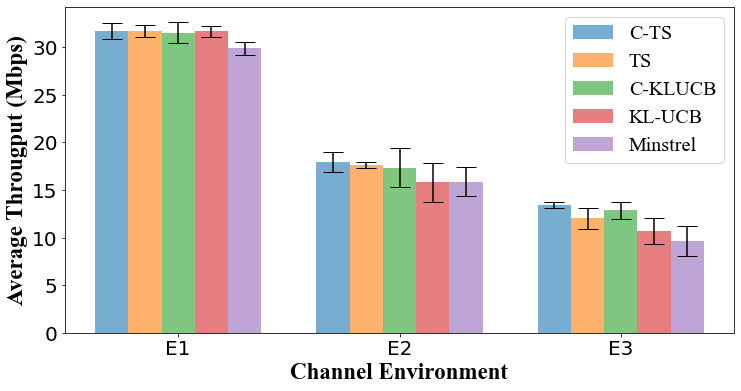

In [198]:
font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal',
                                   size=20)
width = 0.15
fig2 = plt.figure(figsize=(12, 6))
ax2 = fig2.add_subplot(1,1,1)
ax2.bar(x_pos-0.3, TP_cts, width, yerr=Err_cts, align='center', ecolor='black',capsize=10, alpha=0.6)
ax2.bar(x_pos-0.15, TP_ts, width, yerr=Err_ts, align='center', ecolor='black',capsize=10, alpha=0.6)
ax2.bar(x_pos, TP_cklucb, width, yerr=Err_cklucb, align='center', ecolor='black',capsize=10, alpha=0.6)
ax2.bar(x_pos+0.15, TP_klucb, width, yerr=Err_klucb, align='center', ecolor='black',capsize=10, alpha=0.6)
ax2.bar(x_pos+0.3, TP_mins, width, yerr=Err_mins, align='center', ecolor='black',capsize=10, alpha=0.6)
plt.xticks(x_pos, ['E1', 'E2', 'E3'])
plt.tick_params(labelsize=20)
labels=ax1.get_xticklabels()+ax1.get_yticklabels()
plt.xlabel("Channel Environment",fontfamily='Times New Roman',fontsize=23,fontweight='bold')
plt.ylabel("Average Througput (Mbps)",fontfamily='Times New Roman',fontsize=23,fontweight='bold')
plt.legend(["C-TS", "TS", "C-KLUCB",'KL-UCB','Minstrel'],loc='upper right',prop=font)